In [7]:
import os
from json_helper import read_all_json_files

In [9]:
# use json_helper to load all json objects into a dataframe called df_daily_summaries
dir_path = os.path.join('./', 'data', 'daily_summaries')
summaries_df = read_all_json_files(dir_path)
summaries_df

,date,datatype,station,attributes,value,source
0,2018-01-23T00:00:00,PRCP,GHCND:US1DENC0001,",,N,0700",76,daily_summaries_FIPS10003_jan_2018_1.json
1,2018-01-23T00:00:00,PRCP,GHCND:US1DENC0002,",,N,0700",58,daily_summaries_FIPS10003_jan_2018_1.json
2,2018-01-23T00:00:00,SNOW,GHCND:US1DENC0002,",,N,0700",0,daily_summaries_FIPS10003_jan_2018_1.json
3,2018-01-23T00:00:00,SNWD,GHCND:US1DENC0002,",,N,0700",0,daily_summaries_FIPS10003_jan_2018_1.json
4,2018-01-23T00:00:00,WESD,GHCND:US1DENC0002,",,N,0700",0,daily_summaries_FIPS10003_jan_2018_1.json
...,...,...,...,...,...,...
1382,2018-01-22T00:00:00,WDF2,GHCND:USW00013781,",,W,",150,daily_summaries_FIPS10003_jan_2018_0.json
1383,2018-01-22T00:00:00,WDF5,GHCND:USW00013781,",,W,",160,daily_summaries_FIPS10003_jan_2018_0.json
1384,2018-01-22T00:00:00,WSF2,GHCND:USW00013781,",,W,",54,daily_summaries_FIPS10003_jan_2018_0.json
1385,2018-01-22T00:00:00,WSF5,GHCND:USW00013781,",,W,",63,daily_summaries_FIPS10003_jan_2018_0.json


In [10]:
# display a summary of df_daily_summaries
summaries_df.shape

(1387, 6)

How many stations are there in total for FIPS10003

In [11]:
# 
summaries_df['station'].nunique()

17

Create a DataFrame called temps_max that only contains the entries from df_daily_summaries where the datatype column is equal to TMAX. This DataFrame should only retain the date column and the value column.

In [13]:
# 
summaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387 entries, 0 to 1386
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1387 non-null   object
 1   datatype    1387 non-null   object
 2   station     1387 non-null   object
 3   attributes  1387 non-null   object
 4   value       1387 non-null   int64 
 5   source      1387 non-null   object
dtypes: int64(1), object(5)
memory usage: 65.1+ KB


In [14]:
temps_max = summaries_df[summaries_df['datatype'] == 'TMAX']
temps_max.drop(columns = ['station', 'attributes', 'source', 'datatype'], inplace=True)
temps_max

/var/folders/7v/7vx2978j5hn74d9k01hgfwkr0000gp/T/ipykernel_4352/2099638978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temps_max.drop(columns = ['station', 'attributes', 'source', 'datatype'], inplace=True)


,date,value
34,2018-01-23T00:00:00,172
77,2018-01-24T00:00:00,72
120,2018-01-25T00:00:00,28
164,2018-01-26T00:00:00,39
207,2018-01-27T00:00:00,150
243,2018-01-28T00:00:00,133
292,2018-01-29T00:00:00,78
335,2018-01-30T00:00:00,39
381,2018-01-31T00:00:00,6
429,2018-01-01T00:00:00,-60


How many entries are there in the temps_max DataFrame? What are the mean, min, and max values?

In [15]:
# 
temps_max.describe()

,value
count,31.000000
mean,48.193548
std,77.768640
min,-88.000000
25%,-2.500000
50%,39.000000
75%,125.000000
max,172.000000


Let's graph this DataFrame so we can get a visual representation for this information.

In [16]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

In [18]:
x = temps_max['date'].str[8:10]
y = temps_max['value'] / 10

[Text(0.5, 0, 'day of month'),
 Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 1.0, 'Max Temperatues Jan 2018')]

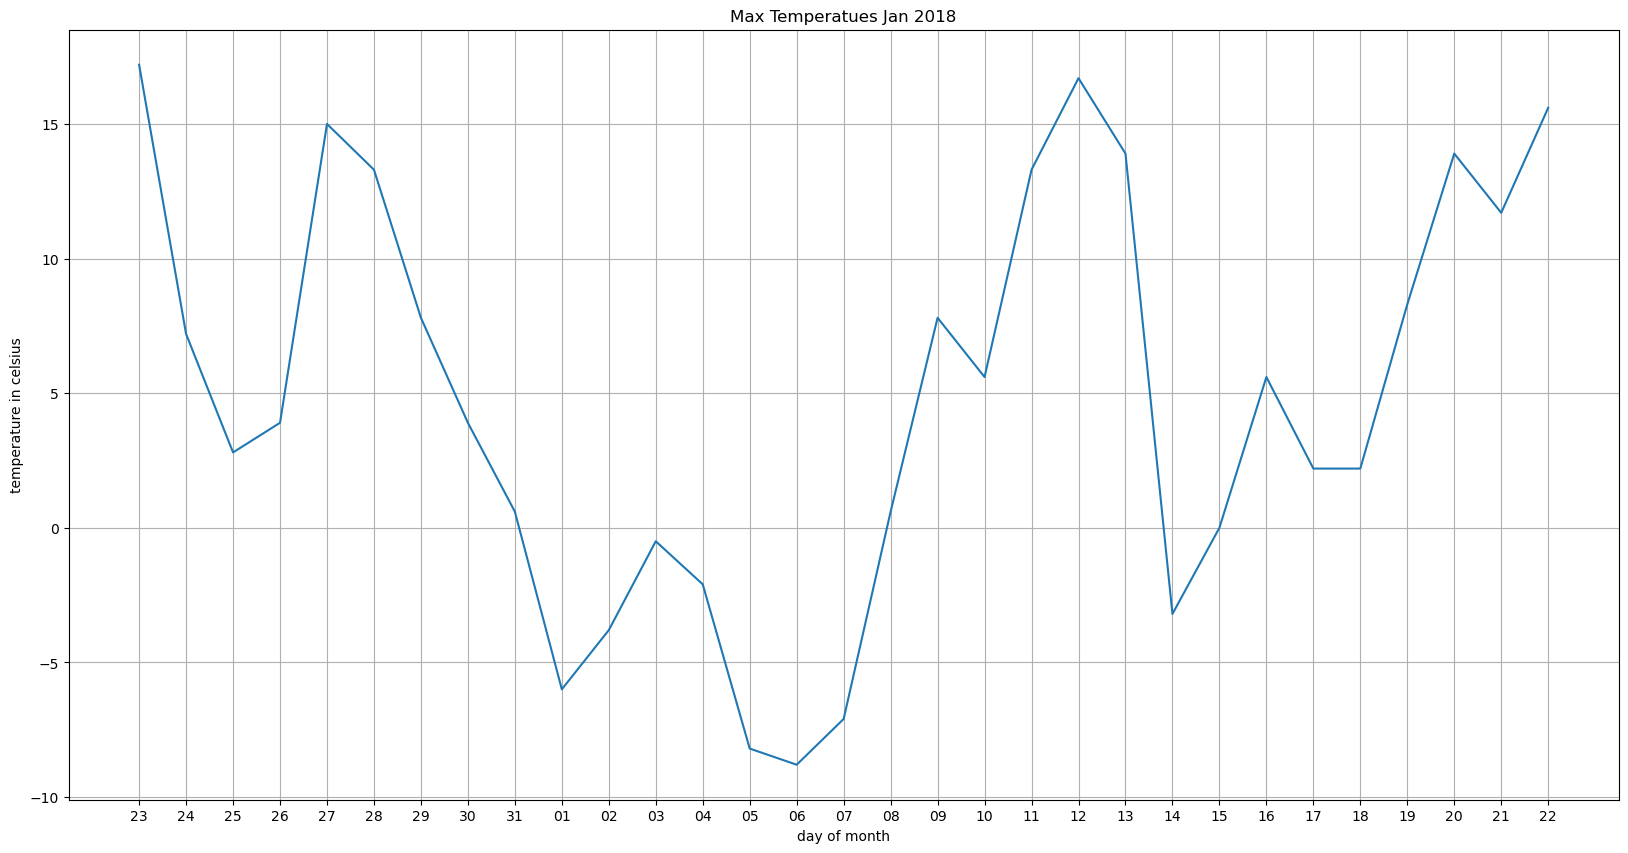

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, y)
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Max Temperatues Jan 2018')

Create a DataFrame called temps_min that only contains the entries from df_daily_summaries where the datatype column is equal to TMIN. This DataFrame should only retain the date column and the value column.

In [20]:
# 
temps_min = summaries_df[summaries_df['datatype'] == 'TMIN']
temps_min.drop(columns = ['station', 'attributes', 'source', 'datatype'], inplace=True)

/var/folders/7v/7vx2978j5hn74d9k01hgfwkr0000gp/T/ipykernel_4352/910593812.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temps_min.drop(columns = ['station', 'attributes', 'source', 'datatype'], inplace=True)


In [21]:
temps_min

,date,value
35,2018-01-23T00:00:00,44
78,2018-01-24T00:00:00,6
121,2018-01-25T00:00:00,-38
165,2018-01-26T00:00:00,-66
208,2018-01-27T00:00:00,-49
244,2018-01-28T00:00:00,72
293,2018-01-29T00:00:00,33
336,2018-01-30T00:00:00,-55
382,2018-01-31T00:00:00,-93
430,2018-01-01T00:00:00,-149


How many entries are there in the temps_min DataFrame? What are the mean, min, and max values?

In [22]:
# 
temps_min.describe()

,value
count,31.000000
mean,-55.225806
std,65.749378
min,-166.000000
25%,-102.000000
50%,-66.000000
75%,-24.000000
max,83.000000


Graph the temps_min DataFrame

[Text(0.5, 0, 'day of month'),
 Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 1.0, 'Min Temperatues Jan 2018')]

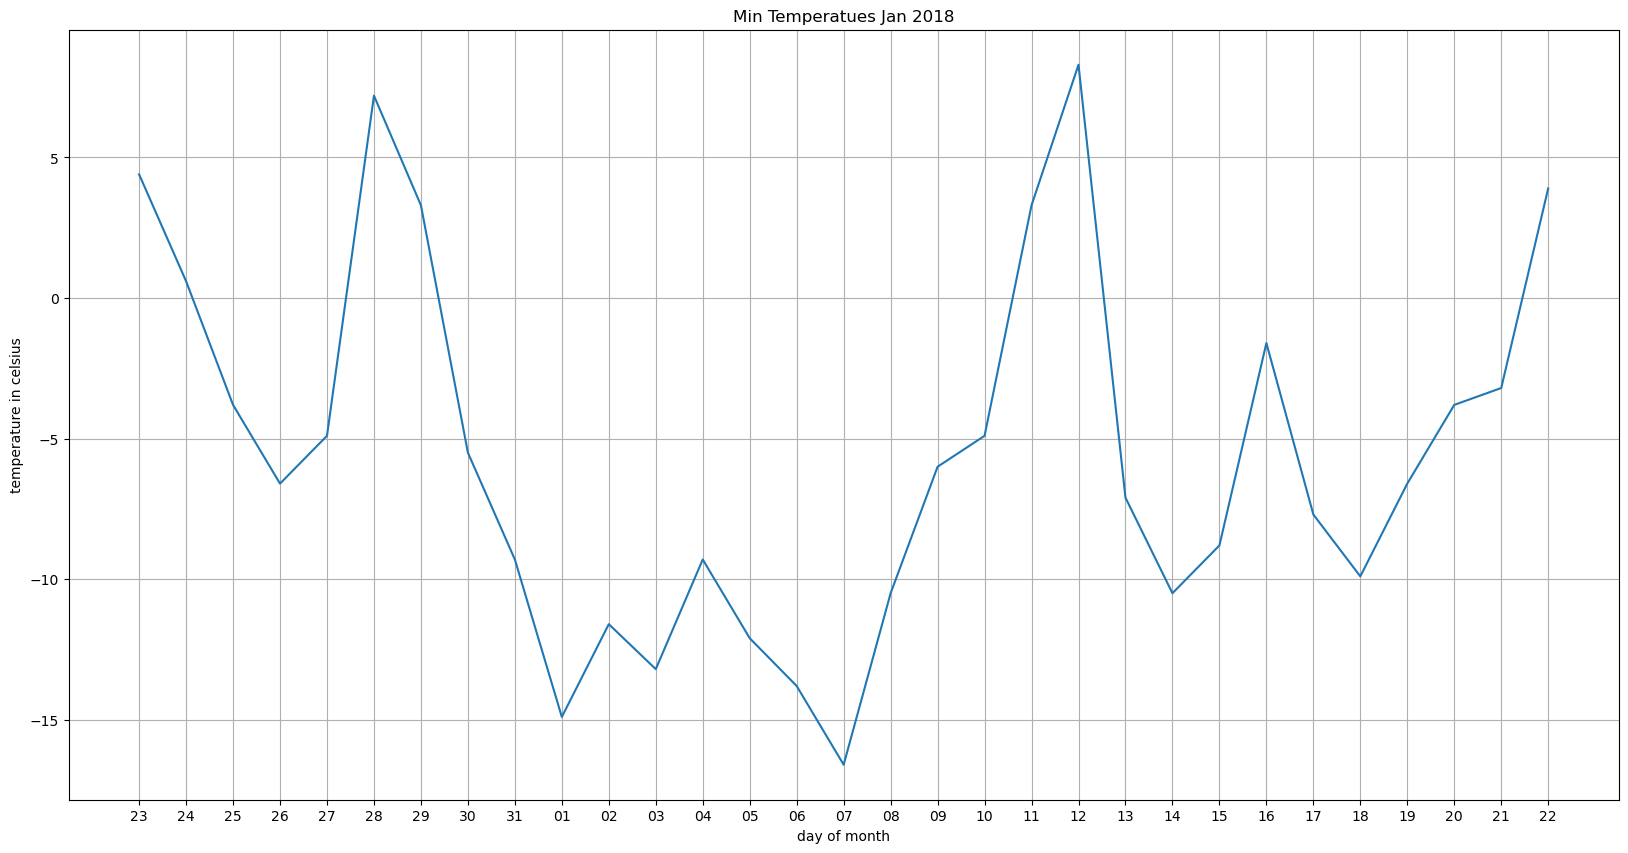

In [23]:
# 
x = temps_min['date'].str[8:10]
y = temps_min['value'] / 10
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, y)
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Min Temperatues Jan 2018')

We can also plot both of these lines in the same graph.

[Text(0.5, 0, 'day of month'),
 Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 1.0, 'Min & Max Temperatues Jan 2018')]

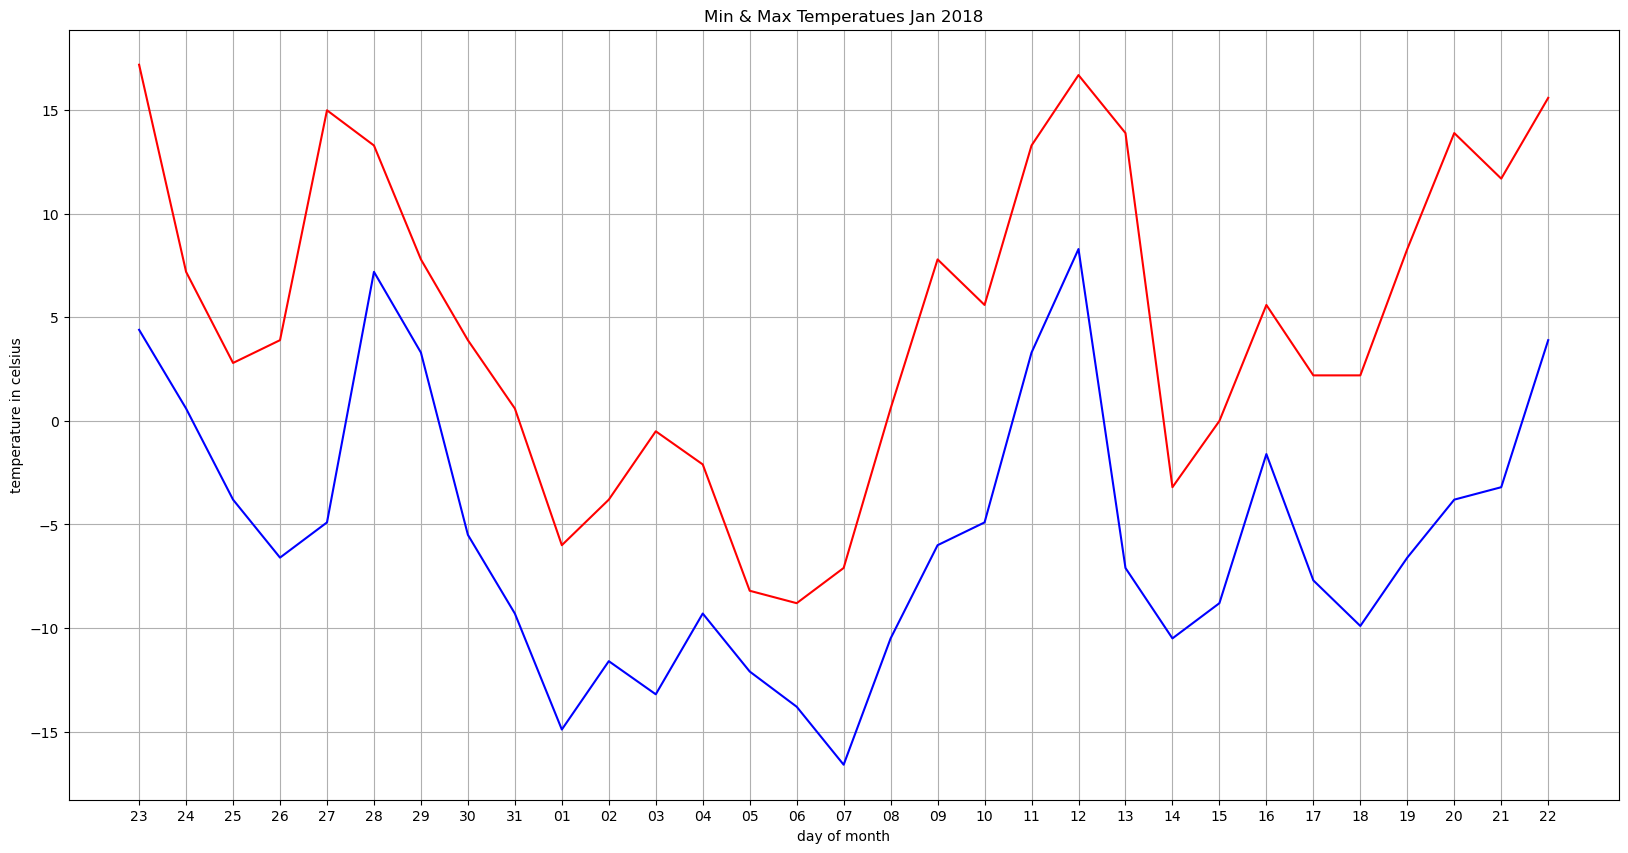

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.plot(x, temps_max['value'] / 10, color='red')
ax.plot(x, temps_min['value'] / 10, color='blue')
ax.grid()
ax.set(xlabel='day of month', ylabel='temperature in celsius', title='Min & Max Temperatues Jan 2018')